# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_1 = sinasc_raw[["munResLat", "munResLon", "munResAlt"]]
sinasc_1.head(2)

,munResLat,munResLon,munResAlt
0,-11.93554,-61.99982,338.0
1,-11.93554,-61.99982,338.0


In [13]:
sinasc_1["munResLat"].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [15]:
sinasc_latitude = pd.cut(sinasc_1["munResLat"], [-13.499760, -10.5, -8.768890]) 
sinasc_latitude

0        (-13.5, -10.5]
1        (-13.5, -10.5]
2        (-13.5, -10.5]
3        (-13.5, -10.5]
4        (-13.5, -10.5]
              ...      
27023    (-13.5, -10.5]
27024    (-13.5, -10.5]
27025    (-13.5, -10.5]
27026    (-13.5, -10.5]
27027    (-13.5, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-13.5, -10.5] < (-10.5, -8.769]]

In [29]:
sinasc_1.pivot_table(values="munResLat",
                    index=[sinasc_latitude],
                    columns=["munResLon","munResAlt"],
                    aggfunc=["mean", "sum", "median", "var", "max", "min", "std"],
                    dropna=True)

mean                                                    \
munResLon       -65.32915 -65.32395 -64.23165 -63.83145 -63.82968 -63.70002   
munResAlt           151.0     133.0     145.0     87.0      153.0     85.0    
munResLat                                                                     
(-13.5, -10.5]        NaN -10.77388 -12.43601       NaN       NaN       NaN   
(-10.5, -8.769] -10.41177       NaN       NaN  -8.76889 -10.20981  -8.78502   

                                                         ...       std  \
munResLon       -63.62499 -63.57086 -63.31763 -63.29556  ... -61.44294   
munResAlt           206.0     166.0     128.0     155.0  ...     177.0   
munResLat                                                ...             
(-13.5, -10.5]  -10.56842  -12.0638       NaN       NaN  ...       0.0   
(-10.5, -8.769]       NaN       NaN  -9.71667  -10.2631  ...       NaN   

                                                                             \
munResLon       -61.31655 -61.18367 -61.04438 -61.02017 -60.94870 -60.90185   
munResAlt           245.0     186.0     170.0     263.0     269.0     340.0   
munResLat                                                                     
(-13.5, -10.5]        0.0       0.0       0.0       0.0       0.0       0.0   
(-10.5, -8.769]       NaN       NaN       NaN       NaN       NaN       NaN   

                                               
munResLon       -60.81843 -60.55507 -60.13858  
munResAlt           263.0     419.0     595.0  
munResLat                                      
(-13.5, -10.5]        0.0       0.0       0.0  
(-10.5, -8.769]       NaN       NaN       NaN  

[2 rows x 357 columns]

In [52]:
sinasc_1.pivot_table(values="munResLat",
                    index=[sinasc_latitude],
                    columns=["munResLon","munResAlt"],
                    aggfunc={"munResLon": [("média",np.mean)],
                            "munResAlt": [("variância",np.var)]},
                    dropna=True)

variância                                                    \
munResLon       -65.32915 -65.32395 -64.23165 -63.83145 -63.82968 -63.70002   
munResAlt           151.0     133.0     145.0     87.0      153.0     85.0    
munResLat                                                                     
(-13.5, -10.5]        NaN       0.0       0.0       NaN       NaN       NaN   
(-10.5, -8.769]       0.0       NaN       NaN       0.0       0.0       0.0   

                                                         ...     média  \
munResLon       -63.62499 -63.57086 -63.31763 -63.29556  ... -61.44294   
munResAlt           206.0     166.0     128.0     155.0  ...     177.0   
munResLat                                                ...             
(-13.5, -10.5]        0.0       0.0       NaN       NaN  ... -61.44294   
(-10.5, -8.769]       NaN       NaN       0.0       0.0  ...       NaN   

                                                                             \
munResLon       -61.31655 -61.18367 -61.04438 -61.02017 -60.94870 -60.90185   
munResAlt           245.0     186.0     170.0     263.0     269.0     340.0   
munResLat                                                                     
(-13.5, -10.5]  -61.31655 -61.18367 -61.04438 -61.02017  -60.9487 -60.90185   
(-10.5, -8.769]       NaN       NaN       NaN       NaN       NaN       NaN   

                                               
munResLon       -60.81843 -60.55507 -60.13858  
munResAlt           263.0     419.0     595.0  
munResLat                                      
(-13.5, -10.5]  -60.81843 -60.55507 -60.13858  
(-10.5, -8.769]       NaN       NaN       NaN  

[2 rows x 102 columns]

In [51]:
sinasc_1.pivot_table(values="munResLat",
                    index=[sinasc_latitude],
                    columns=["munResLon","munResAlt"],
                    aggfunc={"munResLon": [("desvio padrão",np.std)],
                            "munResAlt": [("variância",np.var)]},
                     dropna=True)

variância                                                    \
munResLon       -65.32915 -65.32395 -64.23165 -63.83145 -63.82968 -63.70002   
munResAlt           151.0     133.0     145.0     87.0      153.0     85.0    
munResLat                                                                     
(-13.5, -10.5]        NaN       0.0       0.0       NaN       NaN       NaN   
(-10.5, -8.769]       0.0       NaN       NaN       0.0       0.0       0.0   

                                                         ... desvio padrão  \
munResLon       -63.62499 -63.57086 -63.31763 -63.29556  ...     -61.44294   
munResAlt           206.0     166.0     128.0     155.0  ...         177.0   
munResLat                                                ...                 
(-13.5, -10.5]        0.0       0.0       NaN       NaN  ...           0.0   
(-10.5, -8.769]       NaN       NaN       0.0       0.0  ...           NaN   

                                                                             \
munResLon       -61.31655 -61.18367 -61.04438 -61.02017 -60.94870 -60.90185   
munResAlt           245.0     186.0     170.0     263.0     269.0     340.0   
munResLat                                                                     
(-13.5, -10.5]        0.0       0.0       0.0       0.0       0.0       0.0   
(-10.5, -8.769]       NaN       NaN       NaN       NaN       NaN       NaN   

                                               
munResLon       -60.81843 -60.55507 -60.13858  
munResAlt           263.0     419.0     595.0  
munResLat                                      
(-13.5, -10.5]        0.0       0.0       0.0  
(-10.5, -8.769]       NaN       NaN       NaN  

[2 rows x 102 columns]

In [50]:
sinasc_1.pivot_table(values="munResLat",
                    index=[sinasc_latitude],
                    columns=["munResLon","munResAlt"],
                    aggfunc={"munResLon": [("máximo",np.max)],
                            "munResAlt": [("mínimo",np.min)]},
                    dropna=True)

mínimo                                                    \
munResLon       -65.32915 -65.32395 -64.23165 -63.83145 -63.82968 -63.70002   
munResAlt           151.0     133.0     145.0     87.0      153.0     85.0    
munResLat                                                                     
(-13.5, -10.5]        NaN     133.0     145.0       NaN       NaN       NaN   
(-10.5, -8.769]     151.0       NaN       NaN      87.0     153.0      85.0   

                                                         ...    máximo  \
munResLon       -63.62499 -63.57086 -63.31763 -63.29556  ... -61.44294   
munResAlt           206.0     166.0     128.0     155.0  ...     177.0   
munResLat                                                ...             
(-13.5, -10.5]      206.0     166.0       NaN       NaN  ... -61.44294   
(-10.5, -8.769]       NaN       NaN     128.0     155.0  ...       NaN   

                                                                             \
munResLon       -61.31655 -61.18367 -61.04438 -61.02017 -60.94870 -60.90185   
munResAlt           245.0     186.0     170.0     263.0     269.0     340.0   
munResLat                                                                     
(-13.5, -10.5]  -61.31655 -61.18367 -61.04438 -61.02017  -60.9487 -60.90185   
(-10.5, -8.769]       NaN       NaN       NaN       NaN       NaN       NaN   

                                               
munResLon       -60.81843 -60.55507 -60.13858  
munResAlt           263.0     419.0     595.0  
munResLat                                      
(-13.5, -10.5]  -60.81843 -60.55507 -60.13858  
(-10.5, -8.769]       NaN       NaN       NaN  

[2 rows x 102 columns]

In [43]:
sinasc_1.pivot_table(values="munResLat",
                    index=[sinasc_latitude],
                    columns=["munResLon","munResAlt"],
                    aggfunc={"munResLon": [("soma",np.sum)],
                            "munResAlt": [("soma",np.sum)]},
                    dropna=True)

soma                                                    \
munResLon       -65.32915 -65.32395 -64.23165 -63.83145 -63.82968 -63.70002   
munResAlt           151.0     133.0     145.0     87.0      153.0     85.0    
munResLat                                                                     
(-13.5, -10.5]        NaN  103873.0   33785.0       NaN       NaN       NaN   
(-10.5, -8.769]   65232.0       NaN       NaN  734019.0   89199.0   28645.0   

                                                         ...               \
munResLon       -63.62499 -63.57086 -63.31763 -63.29556  ...    -61.44294   
munResAlt           206.0     166.0     128.0     155.0  ...        177.0   
munResLat                                                ...                
(-13.5, -10.5]    34196.0   50298.0       NaN       NaN  ... -84422.59956   
(-10.5, -8.769]       NaN       NaN   28928.0   30845.0  ...          NaN   

                                                                            \
munResLon         -61.31655    -61.18367  -61.04438   -61.02017  -60.94870   
munResAlt             245.0        186.0      170.0       263.0      269.0   
munResLat                                                                    
(-13.5, -10.5]  -2636.61165 -37689.14072 -2441.7752 -27459.0765 -7740.4849   
(-10.5, -8.769]         NaN          NaN        NaN         NaN        NaN   

                                                                  
munResLon        -60.90185    -60.81843    -60.55507   -60.13858  
munResAlt            340.0        263.0        419.0       595.0  
munResLat                                                         
(-13.5, -10.5]  -9866.0997 -14413.96791 -12958.78498 -95620.3422  
(-10.5, -8.769]        NaN          NaN          NaN         NaN  

[2 rows x 102 columns]

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [19]:
sinasc_2 = sinasc_raw[["munResArea", "CODOCUPMAE", "CODESTAB"]]
sinasc_2.head(2)

,munResArea,CODOCUPMAE,CODESTAB
0,7067.025,NaN,2679477.0
1,7067.025,999992.0,2679477.0


In [53]:
sinasc_2["munResArea"].describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [55]:
sinasc_area = pd.cut(sinasc_2["munResArea"], [459.978000, 3000, 34096.394000]) 
sinasc_area

0        (3000.0, 34096.394]
1        (3000.0, 34096.394]
2        (3000.0, 34096.394]
3        (3000.0, 34096.394]
4        (3000.0, 34096.394]
                ...         
27023    (3000.0, 34096.394]
27024    (3000.0, 34096.394]
27025    (3000.0, 34096.394]
27026    (3000.0, 34096.394]
27027      (459.978, 3000.0]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(459.978, 3000.0] < (3000.0, 34096.394]]

In [56]:
sinasc_2.pivot_table(values="munResArea",
                    index=[sinasc_area],
                    columns=["CODOCUPMAE","CODESTAB"],
                    aggfunc=["mean", "sum", "median", "var", "max", "min", "std"],
                    dropna=True)

mean                                             \
CODOCUPMAE            10205.0    10210.0    20205.0   21205.0               
CODESTAB             2743590.0  2688611.0  6205224.0 2515504.0  2515989.0   
munResArea                                                                  
(459.978, 3000.0]          NaN        NaN        NaN       NaN   1451.060   
(3000.0, 34096.394]  34096.394  34096.394  34096.394  4426.571  11518.915   

                                                                         ...  \
CODOCUPMAE                                           21210.0             ...   
CODESTAB            2516381.0  2798484.0 3152928.0  2515369.0 2516381.0  ...   
munResArea                                                               ...   
(459.978, 3000.0]         NaN        NaN       NaN        NaN       NaN  ...   
(3000.0, 34096.394]  3792.998  11518.915  6896.648  34096.394  3792.998  ...   

                          std                                      \
CODOCUPMAE           999994.0                                       
CODESTAB            2515466.0    2516381.0 2516500.0    2743590.0   
munResArea                                                          
(459.978, 3000.0]         NaN          NaN       NaN          NaN   
(3000.0, 34096.394]       0.0  1340.788671       0.0  5327.742515   

                                                                    \
CODOCUPMAE                                                           
CODESTAB               2784637.0 2808617.0 3970442.0     4001303.0   
munResArea                                                           
(459.978, 3000.0]     528.991988       NaN       NaN    299.640976   
(3000.0, 34096.394]  1890.260370       0.0       0.0  11374.877259   

                                            
CODOCUPMAE                                  
CODESTAB               6205224.0 7648693.0  
munResArea                                  
(459.978, 3000.0]            NaN       NaN  
(3000.0, 34096.394]  6383.854345  1551.825  

[2 rows x 65622 columns]

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [57]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [66]:
sinasc_3 = sinasc_raw[["munResAlt", "IDADEMAE", "PESO"]]
sinasc_3.head(2)

,munResAlt,IDADEMAE,PESO
0,338.0,19,3685
1,338.0,29,3055


In [69]:
print("Utilizo o Método DESCRIBE para saber o mínimo valor e o máximo valor, para conseguir fazer o CUT da forma mais precisa.")

Utilizo o Método DESCRIBE para saber o mínimo valor e o máximo valor, para conseguir fazer o CUT da forma mais precisa.


In [68]:
sinasc_3["munResAlt"].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [71]:
sinasc_alt = pd.cut(sinasc_3["munResAlt"], [85.000000, 153.000000, 595.000000]) 
sinasc_alt.head(2)

0    (153.0, 595.0]
1    (153.0, 595.0]
Name: munResAlt, dtype: category
Categories (2, interval[float64, right]): [(85.0, 153.0] < (153.0, 595.0]]

In [74]:
sinasc_3.pivot_table(values="munResAlt",
                    index=[sinasc_alt],
                    columns=["IDADEMAE","PESO"],
                    aggfunc=["mean", "sum", "median", "var", "max", "min", "std"],
                    dropna=True)

mean                                                     \
IDADEMAE           11     12                                    13         
PESO             3760   1350  2150   2350  2925   3025  3510  1420  1880   
munResAlt                                                                  
(85.0, 153.0]   128.0   87.0  87.0  145.0  87.0    NaN  87.0  87.0  87.0   
(153.0, 595.0]    NaN  163.0   NaN    NaN   NaN  157.0   NaN   NaN   NaN   

                      ...        std                                  \
IDADEMAE              ...         42                                   
PESO            2635  ...       2960       3005       3040      3240   
munResAlt             ...                                              
(85.0, 153.0]   87.0  ...  36.769553  16.970563  36.769553       NaN   
(153.0, 595.0]   NaN  ...        NaN        NaN        NaN  0.707107   

                                                                       \
IDADEMAE                                                           44   
PESO                3320       3380        3420       3430       1590   
munResAlt                                                               
(85.0, 153.0]   3.535534        NaN         NaN  36.769553        NaN   
(153.0, 595.0]       NaN  309.71277  306.884343        NaN  14.849242   

                           
IDADEMAE                   
PESO                 3640  
munResAlt                  
(85.0, 153.0]   36.769553  
(153.0, 595.0]        NaN  

[2 rows x 110318 columns]

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [80]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [81]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [82]:
sinasc_raw.munResNome.head()

0      Alta Floresta D'Oeste
1      Alta Floresta D'Oeste
2      Alta Floresta D'Oeste
3    Alto Alegre dos Parecis
4      Alta Floresta D'Oeste
Name: munResNome, dtype: object

In [83]:
sinasc_4 = sinasc_raw[["munResNome", "IDADEMAE"]]
sinasc_4.head(2)

,munResNome,IDADEMAE
0,Alta Floresta D'Oeste,19
1,Alta Floresta D'Oeste,29


In [85]:
sinasc_4 = sinasc_4.set_index("munResNome")

<Axes: xlabel='munResNome'>

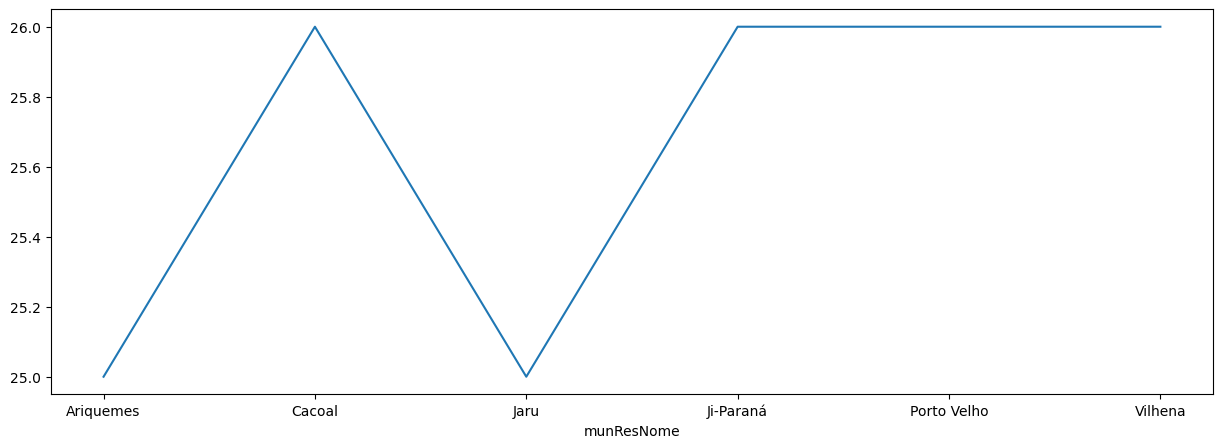

In [94]:
sinasc_4.groupby(imediatas)["IDADEMAE"].median().plot(figsize=[15,5])

<Axes: xlabel='munResNome'>

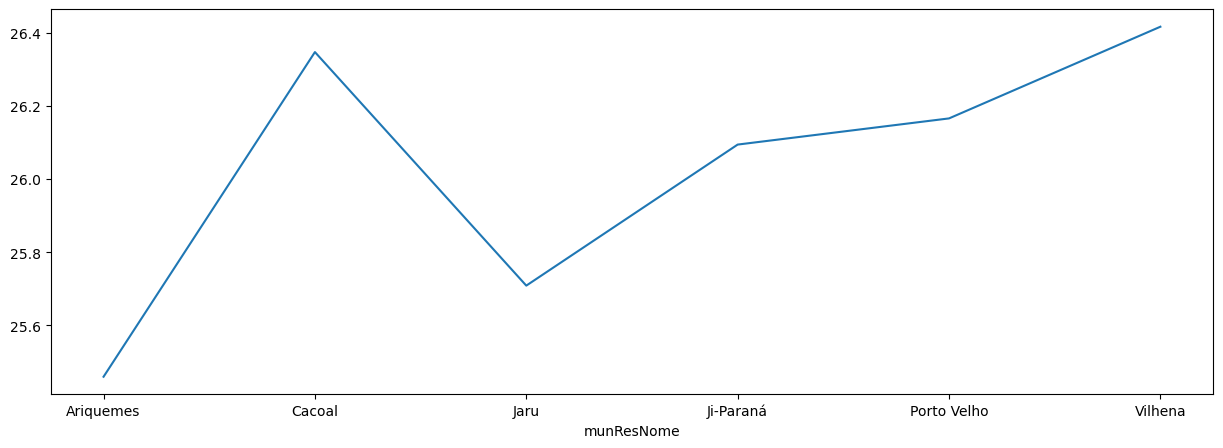

In [95]:
sinasc_4.groupby(imediatas)["IDADEMAE"].mean().plot(figsize=[15,5])

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.